In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Derivatives
Randomly changing and searching for optimal weights and biases did not prove fruitful for one
main reason: the number of possible combinations of weights and biases is infinite, and we need
something smarter than pure luck to achieve any success. Each weight and bias may also have
different degrees of influence on the loss — this influence depends on the parameters themselves
as well as on the current sample, which is an input to the first layer. These input values are then
multiplied by the weights, so the input data affects the neuron’s output and affects the impact that
the weights make on the loss. The same principle applies to the biases and parameters in the next
layers, taking the previous layer’s outputs as inputs. This means that the impact on the output
values depends on the parameters as well as the samples — which is why we are calculating the
loss value per each sample separately. Finally, the function of ​ how ​ a weight or bias impacts the
overall loss is not necessarily linear. In order to know ​ how ​ to adjust weights and biases, we first
need to understand their impact on the loss.
One concept to note is that we refer to weights and biases and their impact on the loss function.
The loss function doesn’t contain weights or biases, though. The input to this function is the
output of the model, and the weights and biases of the neurons influence this output. Thus, even
though we calculate loss from the model’s output, not weights/biases, these weights and biases directly impact the loss.
In the coming chapters, we will describe exactly how this happens by explaining partial
derivatives, gradients, gradient descent, and backpropagation. Basically, we’ll calculate how
much each singular weight and bias changes the loss value (how much of an impact it has on it)
given a sample (as each sample produces a separate output, thus also a separate loss value), and
how to change this weight or bias for the loss value to decrease. Remember — our goal here is
to decrease loss, and we’ll do this by using gradient descent. Gradient, on the other hand, is a
result of the calculation of the partial derivatives, and we’ll backpropagate it using the chain rule
to update all of the weights and biases. Don’t worry if that doesn’t make much sense yet; we’ll
explain all of these terms and how to perform these actions in this and the coming chapters.
To understand partial derivatives, we need to start with derivatives, which are a special case of
partial derivatives — they are calculated from functions taking single parameters.

### The Impact of a Parameter on the Output

Let’s start with a simple function and discover what is meant by “impact.”
A very simple function ​ y=2x ​ , which takes ​ x ​ as an input:

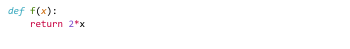

Now let’s create some code around this to visualize the data — we’ll import NumPy and
Matplotlib, create an array of 5 input values from 0 to 4, calculate the function output for each
of these input values, and plot the result as lines between consecutive points. These points’
coordinates are inputs as ​ x ​ and function outputs as ​ y ​ :

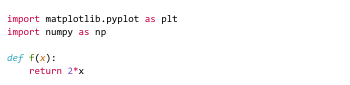

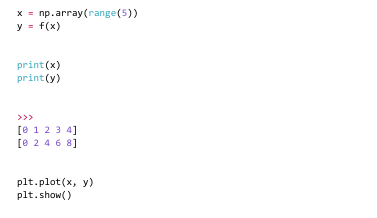

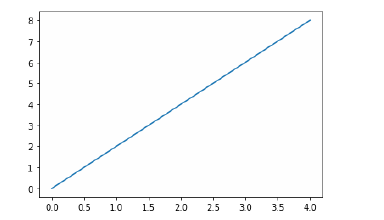
Figure 1: Linear function y=2x graphed

The Slope
This looks like an output of the ​ f(x) = 2x ​ function, which is a line. How might you define the
impact ​ that ​ x ​ will have on ​ y ? ​ Some will say, ​ “y ​ is double ​ x ​ ” Another way to describe the ​ impact
of a linear function such as this comes from algebra: the ​ slope​ . “Rise over run” might be a phrase
you recall from school. The slope of a line is:

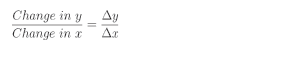

It is change in ​ y ​ divided by change in ​ x, ​ or, in math — ​ delta y ​ divided by ​ delta x . ​ What’s the slope
of ​ f(x) = 2x ​ then?
To calculate the slope, first we have to take any two points lying on the function’s graph and
subtract them to calculate the change. Subtracting the points means to subtract their x and y
dimensions respectively. Division of the change in y by the change in x returns the slope:

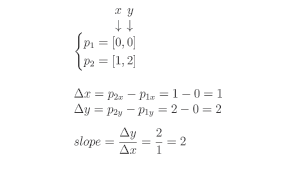
Continuing the code, we keep all values of ​ x ​ in a single-dimensional NumPy array, ​ x ​ , and all
results in a single-dimensional array, ​ y ​ . To perform the same operation, we’ll take ​ x[​ 0 ​ ] ​ and
y[​ 0 ​ ] ​ for the first point, then ​ x[​ 1 ​ ] ​ and ​ y[​ 1 ​ ] ​ for the second one. Now we can calculate the slope
between them:

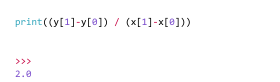

It is not surprising that the slope of this line is 2. We could say the measure of the impact that ​ x
has on ​ y ​ is 2. We can calculate the slope in the same way for any linear function, including linear
functions that aren’t as obvious.
What about a nonlinear function like ​ f(x)=2x 2 ​ ​ ?
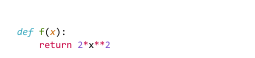
This function creates a graph that does not form a straight line:

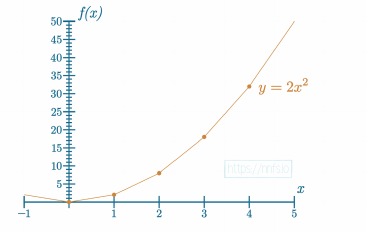

Figure 2:​ Approximation of the parabolic function y=2x​ 2​ graphed
Can we measure the slope of this curve? Depending on which 2 points we choose to use, we will
measure varying slopes:


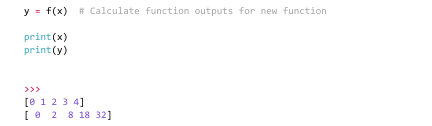
Now for the first pair of points:
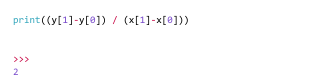
And for another one:
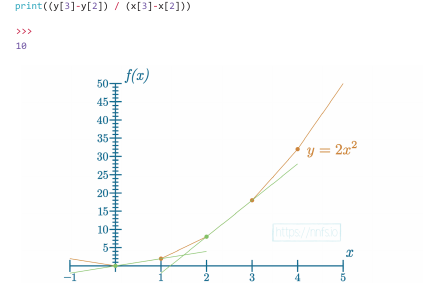

Figure 3:​ Approximation of the parabolic function's example tangents

How might we measure the impact that x has on y in this nonlinear function? Calculus proposes
that we measure the slope of the ​ tangent line​ at ​ x ​ (for a specific input value to the function),
giving us the​ instantaneous slope​ (slope at this point)​ , ​ which is the ​ derivative​ . The ​ tangent line
is created by drawing a line between two points that are “infinitely close” on a curve, but this
curve has to be differentiable at the derivation point. This means that it has to be continuous and
smooth (we cannot calculate the slope at something that we could describe as a “sharp corner,”
since it contains an infinite number of slopes). Then, because this is a curve, there is no single
slope. Slope depends on where we measure it. To give an immediate example, we can
approximate a derivative of the function at ​ x ​ by using this point and another one also taken at x,
but with a very small delta added to it, such as ​ 0.0001 . ​ This number is a common choice as it does
not introduce too large an error (when estimating the derivative) or cause the whole expression to
be numerically unstable (Δ​ x ​ might round to 0 due to floating-point number resolution). This lets
us perform the same calculation for the slope as before, but on two points that are very close to
each other, resulting in a good approximation of a slope at x:
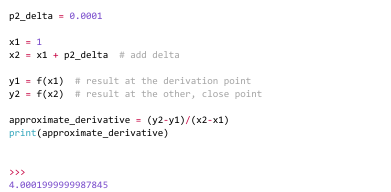
As we will soon learn, the derivative of ​ 2x ​ 2 ​ at ​ x=1 ​ should be exactly ​ 4 ​ . The difference we see
(~4.0002) comes from the method used to compute the tangent. We chose a delta small enough toChapter 7 - Derivatives - Neural Networks from Scratch in Python
13
approximate the derivative as accurately as possible but large enough to prevent a rounding error.
To elaborate, an infinitely small delta value will approximate an accurate derivative; however, the
delta value needs to be numerically stable, meaning, our delta can not surpass the limitations of
Python’s floating-point precision (can’t be too small as it might be rounded to ​ 0 ​ and, as we know,
dividing by ​ 0 ​ is “illegal”). Our solution is, therefore, restricted between estimating the derivative
and remaining numerically stable, thus introducing this small but visible error.

## The Numerical Derivative
This method of calculating the derivative is called ​ numerical differentiation ​ — calculating the
slope of the tangent line using two ​ infinitely ​ close points, or as with the code solution —
calculating the slope of a tangent line made from two points that were “sufficiently close.” We
can visualize why we perform this on two close points with the following:

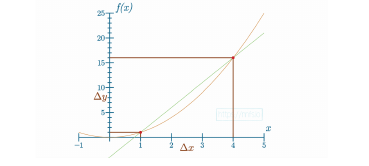
Figure :​ Why we want to use 2 points that are sufficiently close — large delta inaccuracy.